In [2]:
import numpy as np
import networkx as nx
import os
from random import shuffle          # importamos las librerias necesarias
import matplotlib.pylab as plt       
%matplotlib inline
from matplotlib.pyplot import title,xlabel,ylabel,show

In [5]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

In [7]:
def grafo(datosRed):
    G = nx.Graph()
    for i in range(np.shape(datosRed)[0]):
        G.add_edges_from([(datosRed[i][0],datosRed[i][1])])
    return G 

In [39]:
APMS=ldata('yeast_AP-MS.txt')
essentiality=ldata('Essential.txt')

In [40]:
GAPMS=grafo(APMS)

In [41]:
ess=[]
for i in range(len(essentiality)):
    ess.append(essentiality[i][1])

In [106]:
def essentiality(nodo): 
    if len({nodo}.intersection(set(ess)))==0:
        e=0
    else:
        e=1
    return e

In [108]:
dict_ess = { nodo: essentiality(nodo) for nodo  in GAPMS.nodes() } #lista a diccionario

In [111]:
def AssignEssentiality(G,dict_ess):
    for n in G.nodes:
        G.nodes[n]["essentiality"] = dict_ess[n]
    return

AssignEssentiality(GAPMS,dict_ess)

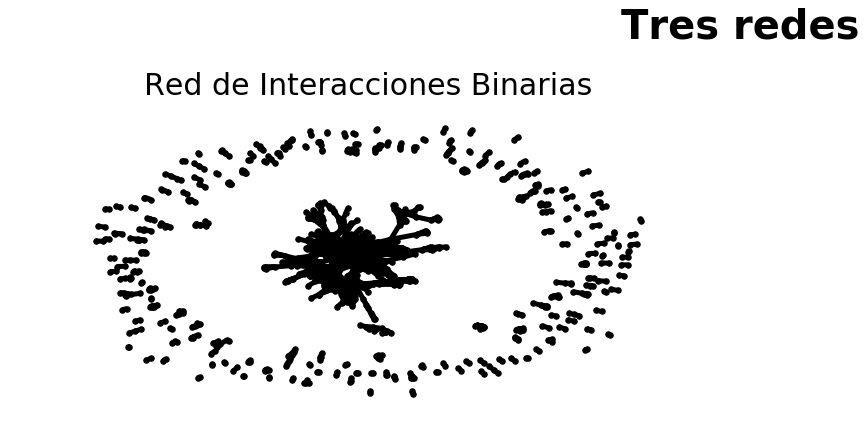

In [113]:
#ponemos estas opciones para que grafique igual en todos los subplots
options = {
     'node_color': 'black',
     'node_size': 30,
     'width': 5,
}

f = plt.figure(figsize=(26,13))                               #con esta linea le damos el tamano a cada subplot
f.suptitle('Tres redes',fontweight="bold", size=40) 
sub1 = f.add_subplot(221)
nx.draw(GAPMS, **options)
# sub2 = plt.subplot(222)
# nx.draw(grafoRedComplejosProteicos, **options)
# sub3 = plt.subplot(223)
# nx.draw(grafoRedLiteratura, **options)
sub1.set_title('Red de Interacciones Binarias', size=30)
# sub2.set_title('Red de Complejos Proteicos', size=30)
# sub3.set_title('Red de la Literatura', size=30)
plt.show()

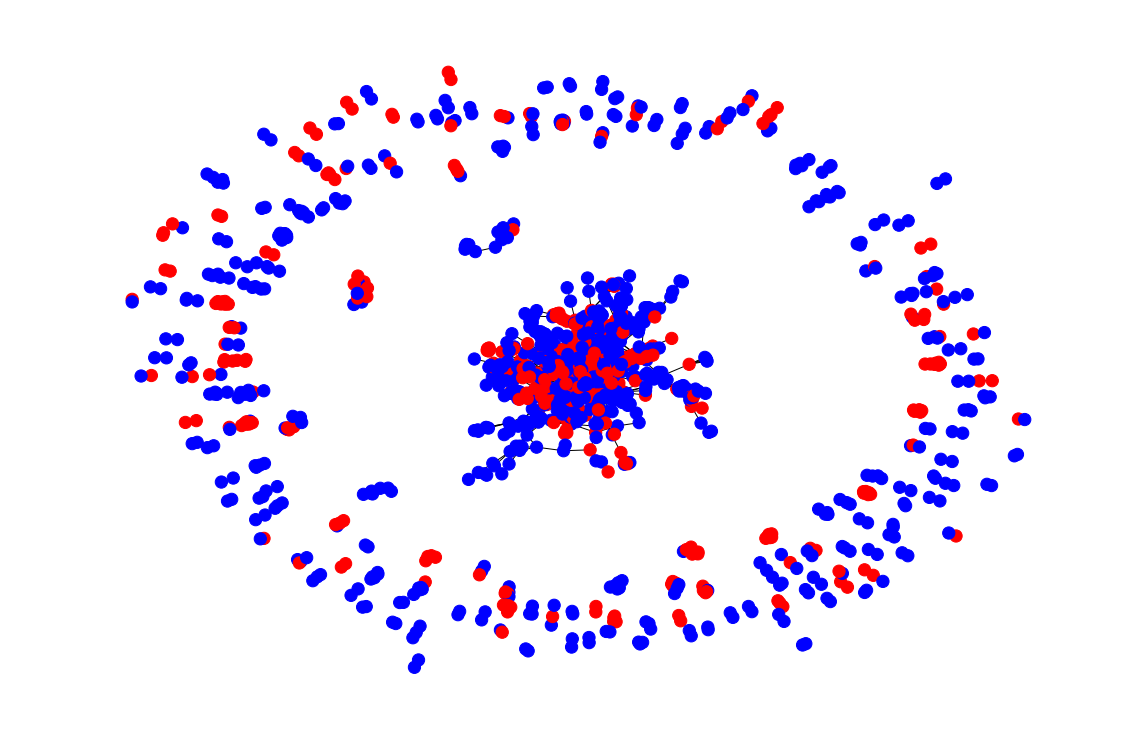

In [117]:
def color(g):                  
    if g==0:
        col='blue'
    else:                   # definimos una funcion para asignar un color distinto
        col='red'
    return col


options = {'node_color':[color(g) for g in nx.get_node_attributes(GAPMS,'essentiality').values()],
           'node_size':150,'with_labels':False}
sub1.set_title('Red de Interacciones Binarias', size=30)
plt.figure(figsize=(15,10))
nx.draw_spring(GAPMS, **options)